# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)





## 1. Introduction/Background
I am using the kaggle Healthcare Insurance Dataset and I plan to measure what factors, specifically if one is a smoker, increases the cost of insurance. Dataset linked below. I will be using a Random Forest model.

https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/

The data was obtained by Kaggle user Willian Oliveira Gibin. This dataset was likely gathered from public data published by healthcare institutions and/or other datasets and Gibin amassed the data into a single dataset. The data was published on Kaggle on 2020-11-09. The data is licensed under CC0: Public Domain which means anyone can use this dataset in anyway they see fit. 

This is a text classification problem because I am inputting the labels of smoker, bmi, and all of the other labels into the model (x) and having the output predict what charge would be generated (y).

Below I am analyzing and displaying the age of the population, the distribution of smokers, and the bmi of smokers.












## 2. Exploratory Data Analysis

I am going to attempt to load the data into a pandas dataframe and see the age range of patients. I think it is an important step since the next necessary step would be to see if there is a correlation between age and smoking before I dig into whether the patient is a man or woman and smokes. 


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.8

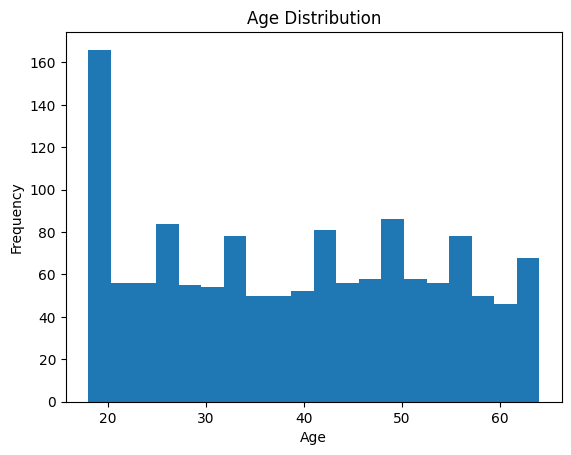

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')  # getting insurance dataset
# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Perform simple data analysis
print("\nStatistics:")
print(data.describe())

# Visualize data (you may need to install matplotlib for this)
import matplotlib.pyplot as plt

data['age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


It would seem that the mode appears to be approximately 18 years old. I now plan to investigate how a younger age correlates with the price generated from the model and what a Random Forest model would predict for a younger individual. 

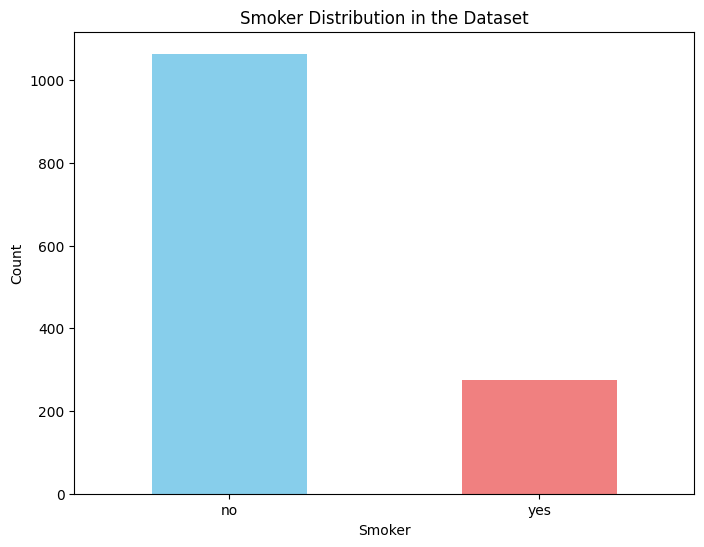

Smoker Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64

Percentage of Smokers: 20.47832585949178 %


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display the distribution of smokers
smoker_counts = data['smoker'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
smoker_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Smoker Distribution in the Dataset')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of smokers
print("Smoker Distribution:")
print(smoker_counts)

# Calculate the percentage of smokers
total_count = data.shape[0]
smoker_percentage = (smoker_counts['yes'] / total_count) * 100
print("\nPercentage of Smokers:", smoker_percentage, "%")


Smokers are in the minority in this dataset. I hypothesize that a Random Forest will predict a higher charge for smokers than non-smokers.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366


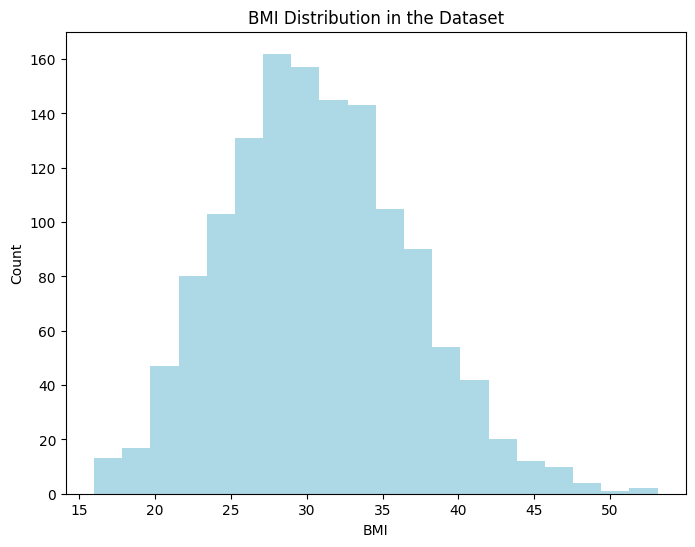


BMI Statistics:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the distribution of BMI
bmi_counts = data['bmi'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
data['bmi'].plot(kind='hist', bins=20, color='lightblue')
plt.title('BMI Distribution in the Dataset')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Display BMI statistics
print("\nBMI Statistics:")
print(data['bmi'].describe())


It would appear that the majority of the patients have a BMI under 34.69. In part 2 I will investigate if the max BMI increases one's healthcare insurance. 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366


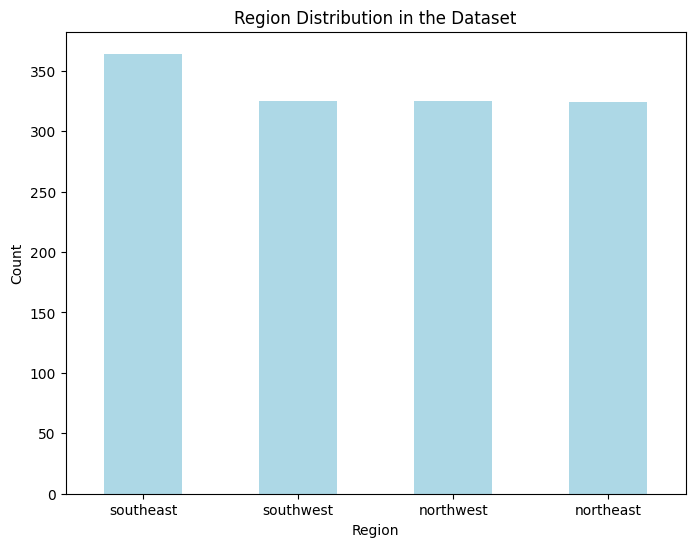


Region Counts:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the distribution of Region
region_counts = data['region'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='lightblue')
plt.title('Region Distribution in the Dataset')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

# Display Region statistics
print("\nRegion Counts:")
print(region_counts)
